# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

VErificação da quantidade de dados nulos

In [4]:
# seu código aqui
(penguins.isnull().sum() / penguins.shape[0]) * 100

,0
species,0.000000
island,0.000000
bill_length_mm,0.581395
bill_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,3.197674


Verificação se os dados estão corretos em sua tipagem

In [5]:
penguins.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [6]:
penguins.drop(columns=['island', 'sex'], inplace=True)

Retirada das colunas que não farão sentido para este execício

In [7]:
penguins.dropna(inplace=True)

Retirada de dados nulos, após a conclusão de que a quantidade de dados era baixa

In [8]:
(penguins.isnull().sum() / penguins.shape[0]) * 100

,0
species,0.0
bill_length_mm,0.0
bill_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

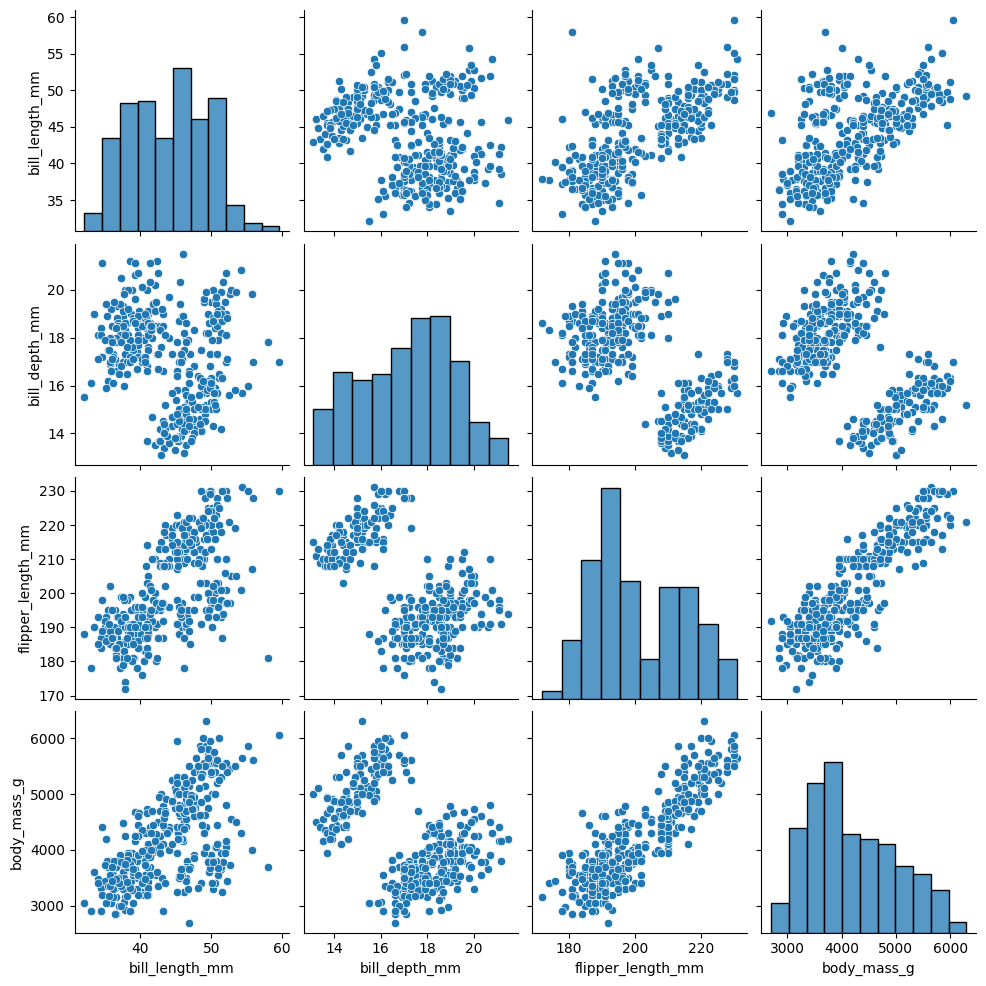

In [9]:
# seu código aqui
sns.pairplot(penguins)

É possivel ver sim o agrupamento em determinados gráficos, em alguns dois grupos em outros três, mas é bem visível a divisão

# 3 - Realize a padronização dos dados e visualize os dados.

In [15]:
# seu código aqui
penguins_padronizado = penguins.copy()

In [16]:
colunas_padronizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
penguins_padronizado[colunas_padronizar] = scaler.fit_transform(penguins_padronizado[colunas_padronizar])

In [17]:
penguins_padronizado

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,-0.884499,0.785449,-1.418347,-0.564142
1,Adelie,-0.811126,0.126188,-1.062250,-0.501703
2,Adelie,-0.664380,0.430462,-0.421277,-1.188532
4,Adelie,-1.324737,1.089724,-0.563715,-0.938776
5,Adelie,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...,...
338,Gentoo,0.601305,-1.750171,0.931890,0.903175
340,Gentoo,0.527932,-1.445897,1.003109,0.809516
341,Gentoo,1.188289,-0.735923,1.501644,1.933419
342,Gentoo,0.234440,-1.192335,0.789451,1.246590


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [21]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(penguins_padronizado.drop(columns=['species']))

KMeans(n_clusters=3, n_init=10, random_state=42)

# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [23]:
# seu código aqui
fig = px.scatter(penguins_padronizado, x='bill_length_mm', y='bill_depth_mm', color=kmeans.labels_)
fig.add_scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', marker=dict(color='red', size=10))
fig.show()

In [24]:
fig = px.scatter(penguins_padronizado, x='flipper_length_mm', y='body_mass_g', color=kmeans.labels_)
fig.add_scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', marker=dict(color='red', size=10))
fig.show()

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:



###1.   Detecção de Anomalias/Fraudes:
Os algoritmos de clusterização podem ser usados para identificar pontos de dados que não se encaixam em nenhum cluster bem definido (outliers). Em transações financeiras, por exemplo, um cluster pode representar o comportamento de compra "normal" de um cliente. Qualquer transação que esteja muito distante desse cluster pode ser um indicativo de fraude ou comportamento incomum.

###2.   Análise de Imagens e Processamento de Sinais:
 Na área de visão computacional e processamento de imagens, a clusterização é utilizada para:

Segmentação de Imagem: Agrupar pixels com cores, texturas ou intensidades semelhantes para isolar regiões de interesse na imagem (por exemplo, separar o céu, a grama e edifícios).

Compressão de Imagem: Agrupar cores semelhantes para reduzir a paleta de cores usada, diminuindo o tamanho do arquivo sem grande perda de qualidade.

###3. Bioinformática e Análise Genômica:

Agrupamento de Genes/Proteínas: Agrupar genes ou proteínas que exibem padrões de expressão semelhantes em diferentes condições, sugerindo que eles podem ter funções biológicas relacionadas.

Classificação de Tipos Celulares: Agrupar células com base em seus perfis moleculares para identificar subtipos de células não conhecidos anteriormente.
